In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import matplotlib as mpl
import matplotlib.font_manager as fm



mpl.rc('font', family='Malgun Gothic') # 한글 폰트 지정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
crime_df = pd.read_csv('/content/drive/MyDrive/범죄전체.csv')
crime_df = pd.read_csv('/content/drive/MyDrive/crime.csv', encoding='cp949')

In [4]:
crime_df

,범죄대분류,범죄중분류,생활정도(계),생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(계),혼인관계(소계),혼인관계(유배우자),...,미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
0,강력범죄,살인기수,341,172,72,6,91,341,158,81,...,45,0,2,8,0,17,0,0,20,91
1,강력범죄,살인미수등,454,276,93,3,82,454,234,123,...,82,1,0,10,1,19,0,1,24,82
2,강력범죄,강도,1202,713,327,15,147,1202,257,144,...,615,2,8,37,8,69,0,3,56,147
3,강력범죄,강간,6113,1831,1987,78,2217,6113,1295,798,...,1998,8,23,143,19,270,0,2,139,2216
4,강력범죄,유사강간,934,331,362,7,234,934,236,145,...,352,1,4,21,3,55,0,1,29,232
5,강력범죄,강제추행,16382,5805,6798,284,3495,16382,6527,4740,...,4585,11,22,282,32,816,3,8,598,3498
6,강력범죄,기타 강간 강제추행등,349,157,126,5,61,349,99,53,...,143,0,3,13,1,21,0,0,8,61
7,강력범죄,방화,1196,774,268,6,148,1196,579,312,...,261,2,2,21,5,73,0,1,104,148
8,절도범죄,소계,98425,58626,28786,765,10248,98425,43426,27849,...,31344,151,275,2486,244,4540,42,61,5600,10256
9,폭력범죄,상해,43552,23525,15251,455,4321,43552,24499,17317,...,10254,54,63,620,64,1974,10,17,1674,4323


In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [6]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   범죄대분류            38 non-null     object
 1   범죄중분류            38 non-null     object
 2   생활정도(계)          38 non-null     int64 
 3   생활정도(하류)         38 non-null     int64 
 4   생활정도(중류)         38 non-null     int64 
 5   생활정도(상류)         38 non-null     int64 
 6   생활정도(미상)         38 non-null     int64 
 7   혼인관계(계)          38 non-null     int64 
 8   혼인관계(소계)         38 non-null     int64 
 9   혼인관계(유배우자)       38 non-null     int64 
 10  혼인관계(동거)         38 non-null     int64 
 11  혼인관계(이혼)         38 non-null     int64 
 12  혼인관계(사별)         38 non-null     int64 
 13  미혼자부모관계(소계)      38 non-null     int64 
 14  미혼자부모관계(실(양)부모)  38 non-null     int64 
 15  미혼자부모관계(계부모)     38 non-null     int64 
 16  미혼자부모관계(실부계모)    38 non-null     int64 
 17  미혼자부모관계(실부무모)    38 non-null     int6

In [7]:
sns.scatterplot(x='도로교통법(음주운전)', y='도로교통법(사고후미조치)', data=crime_df, alpha=0.2, )


ValueError: ignored

In [ ]:
sns.displot(crime_df['절도'])

In [ ]:
sns.displot(crime_df['살인'])

In [ ]:
sns.boxplot(y=crime_df['살인'])

In [ ]:
sns.displot(crime_df['살인'])

In [ ]:
crime_df.head()

In [10]:
crime_df['범죄분류'].unique()
crime_df.groupby(['범죄분류']).count()

KeyError: ignored

In [9]:
crime_df_group = crime_df.groupby('범죄분류').sum()
crime_df_group

KeyError: ignored

In [8]:
# 범죄대분류별 합계 계산
crime_df_group = np.sum(crime_df.groupby('범죄분류').sum(), axis=1) # axis=1 은 같은 행별로 계산하는 옵션이다.

# 인덱스 재설정
crime_df_group = pd.DataFrame(crime_df_group).reset_index()

# 컬럼명 변경
crime_df_group.rename(columns = {0:'total'}, inplace = True) # inplace = True: 변경 사항을 바로 적용

# 'total' 기준으로 내림차순 정렬
crime_df_group.sort_values(by='total', ascending=False, inplace = True)

crime_df_group

KeyError: ignored

In [11]:
crime_list = crime_df_group['범죄분류'].tolist()
crime_list

NameError: ignored

NameError: ignored

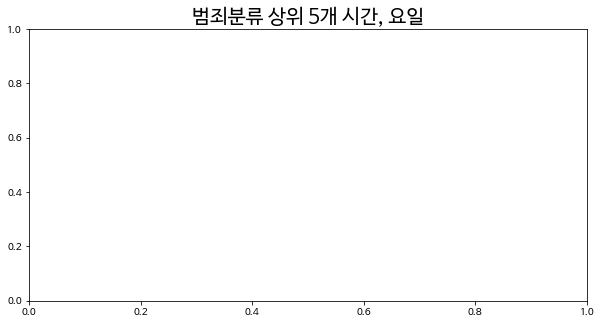

In [12]:
plt.figure(figsize = (10, 5)) # 그래프 크기 설정
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 지정(맑은 고딕)
plt.title('범죄분류 상위 5개 시간, 요일', fontsize=20) # 그래프 제목 설정

sns.set_style('darkgrid') # 그래프 스타일 지정
sns.barplot(data=crime_df_group, x= '범죄분류', y = 'total', order = crime_list[:5])

plt.ylabel('총 빈도수', fontsize = 15)
plt.xlabel('범죄분류', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

In [13]:
# 범죄중분류별 합계 계산
df2['합계'] = np.sum(df2, axis=1)
df2

# 합계를 기준으로 내림차순
df3 = df2[['범죄중분류','합계']].sort_values(by='합계', ascending = False)
df3

NameError: ignored

In [14]:
df1 = pd.read_csv('/content/drive/MyDrive/crime.csv', encoding='cp949')
df1.head()
df1.tail()
df1.info()
df1.index
df1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   범죄대분류            38 non-null     object
 1   범죄중분류            38 non-null     object
 2   생활정도(계)          38 non-null     int64 
 3   생활정도(하류)         38 non-null     int64 
 4   생활정도(중류)         38 non-null     int64 
 5   생활정도(상류)         38 non-null     int64 
 6   생활정도(미상)         38 non-null     int64 
 7   혼인관계(계)          38 non-null     int64 
 8   혼인관계(소계)         38 non-null     int64 
 9   혼인관계(유배우자)       38 non-null     int64 
 10  혼인관계(동거)         38 non-null     int64 
 11  혼인관계(이혼)         38 non-null     int64 
 12  혼인관계(사별)         38 non-null     int64 
 13  미혼자부모관계(소계)      38 non-null     int64 
 14  미혼자부모관계(실(양)부모)  38 non-null     int64 
 15  미혼자부모관계(계부모)     38 non-null     int64 
 16  미혼자부모관계(실부계모)    38 non-null     int64 
 17  미혼자부모관계(실부무모)    38 non-null     int6

Index(['범죄대분류', '범죄중분류', '생활정도(계)', '생활정도(하류)', '생활정도(중류)', '생활정도(상류)',
       '생활정도(미상)', '혼인관계(계)', '혼인관계(소계)', '혼인관계(유배우자)', '혼인관계(동거)', '혼인관계(이혼)',
       '혼인관계(사별)', '미혼자부모관계(소계)', '미혼자부모관계(실(양)부모)', '미혼자부모관계(계부모)',
       '미혼자부모관계(실부계모)', '미혼자부모관계(실부무모)', '미혼자부모관계(실모계부)', '미혼자부모관계(실모무부)',
       '미혼자부모관계(계부무모)', '미혼자부모관계(계모무부)', '미혼자부모관계(무부모)', '미상'],
      dtype='object')

In [15]:
df1['범죄대분류'].unique()
df1.groupby(['범죄대분류']).count()

,범죄중분류,생활정도(계),생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(계),혼인관계(소계),혼인관계(유배우자),혼인관계(동거),...,미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
범죄대분류,,,,,,,,,,,,,,,,,,,,,
강력범죄,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
교통범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
기타범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
노동범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
마약범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
병역범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
보건범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
선거범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
안보범죄,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
# 범죄대분류별로 그룹화
df1_group = df1.groupby('범죄대분류').sum()
df1_group

,생활정도(계),생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(계),혼인관계(소계),혼인관계(유배우자),혼인관계(동거),혼인관계(이혼),...,미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
범죄대분류,,,,,,,,,,,,,,,,,,,,,
강력범죄,26971,10059,10033,404,6475,26971,9385,6396,367,2347,...,8081,25,64,535,69,1340,3,16,978,6475
교통범죄,356446,127215,92001,1725,135505,356446,140745,114965,2768,19647,...,63086,301,199,3123,224,8383,46,178,4427,135734
기타범죄,244539,90514,74578,3118,76329,244539,110901,82079,3410,21388,...,41152,272,227,2722,235,6961,35,80,5615,76339
노동범죄,613,264,209,7,133,613,369,275,12,76,...,83,0,0,8,0,12,0,0,8,133
마약범죄,11630,6628,3699,270,1033,11630,5643,3380,253,1360,...,3813,13,21,186,28,591,4,7,291,1033
병역범죄,3164,1955,911,11,287,3164,376,265,31,79,...,1762,20,20,222,24,317,3,11,122,287
보건범죄,21810,9159,8139,734,3778,21810,12964,9429,310,2586,...,3835,44,16,206,17,568,2,5,375,3778
선거범죄,1545,391,509,59,586,1545,720,618,4,69,...,183,0,0,5,1,19,0,0,26,591
안보범죄,678,338,260,3,77,678,156,101,12,39,...,352,1,1,16,3,46,0,0,26,77


In [17]:
# 범죄대분류별 합계 계산
df1_group = np.sum(df1.groupby('범죄대분류').sum(), axis=1) # axis=1 은 같은 행별로 계산하는 옵션이다.

# 인덱스 재설정
df1_group = pd.DataFrame(df1_group).reset_index()

# 컬럼명 변경
df1_group.rename(columns = {0:'total'}, inplace = True) # inplace = True: 변경 사항을 바로 적용

# 'total' 기준으로 내림차순 정렬
df1_group.sort_values(by='total', ascending=False, inplace = True)

df1_group

,범죄대분류,total
1,교통범죄,1646496
12,폭력범죄,1463456
10,지능범죄,1392123
2,기타범죄,1146356
9,절도범죄,481869
11,특별경제범죄,319206
13,풍속범죄,169742
0,강력범죄,128380
6,보건범죄,105272
4,마약범죄,57117


In [18]:
crime_list = df1_group['범죄대분류'].tolist()
crime_list

['교통범죄',
 '폭력범죄',
 '지능범죄',
 '기타범죄',
 '절도범죄',
 '특별경제범죄',
 '풍속범죄',
 '강력범죄',
 '보건범죄',
 '마약범죄',
 '환경범죄',
 '병역범죄',
 '선거범죄',
 '안보범죄',
 '노동범죄']

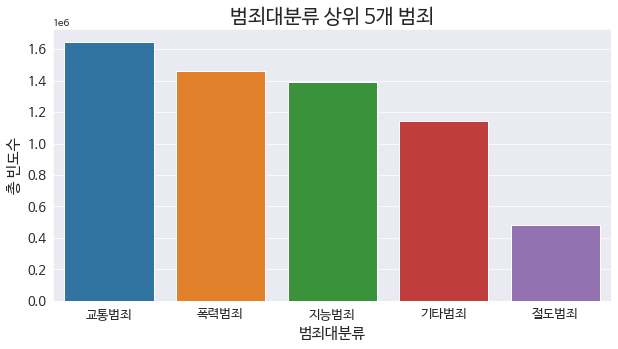

In [19]:
plt.figure(figsize = (10, 5)) # 그래프 크기 설정
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 지정(맑은 고딕)
plt.title('범죄대분류 상위 5개 범죄', fontsize=20) # 그래프 제목 설정

sns.set_style('darkgrid') # 그래프 스타일 지정
sns.barplot(data=df1_group, x= '범죄대분류', y = 'total', order = crime_list[:5])

plt.ylabel('총 빈도수', fontsize = 15)
plt.xlabel('범죄대분류', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()


In [20]:
# 조건 설정
cond1 = (df1['범죄대분류'] == '강력범죄')
df2 = df1.loc[cond1].drop(columns = '범죄대분류')
df2

,범죄중분류,생활정도(계),생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(계),혼인관계(소계),혼인관계(유배우자),혼인관계(동거),...,미혼자부모관계(실(양)부모),미혼자부모관계(계부모),미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상
0,살인기수,341,172,72,6,91,341,158,81,7,...,45,0,2,8,0,17,0,0,20,91
1,살인미수등,454,276,93,3,82,454,234,123,19,...,82,1,0,10,1,19,0,1,24,82
2,강도,1202,713,327,15,147,1202,257,144,23,...,615,2,8,37,8,69,0,3,56,147
3,강간,6113,1831,1987,78,2217,6113,1295,798,65,...,1998,8,23,143,19,270,0,2,139,2216
4,유사강간,934,331,362,7,234,934,236,145,9,...,352,1,4,21,3,55,0,1,29,232
5,강제추행,16382,5805,6798,284,3495,16382,6527,4740,206,...,4585,11,22,282,32,816,3,8,598,3498
6,기타 강간 강제추행등,349,157,126,5,61,349,99,53,5,...,143,0,3,13,1,21,0,0,8,61
7,방화,1196,774,268,6,148,1196,579,312,33,...,261,2,2,21,5,73,0,1,104,148


In [21]:
# 범죄중분류별 합계 계산
df2['합계'] = np.sum(df2, axis=1)
df2

# 합계를 기준으로 내림차순
df3 = df2[['범죄중분류','합계']].sort_values(by='합계', ascending = False)
df3

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


,범죄중분류,합계
5,강제추행,78412
3,강간,28349
2,강도,5863
7,방화,5832
4,유사강간,4438
1,살인미수등,2188
6,기타 강간 강제추행등,1684
0,살인기수,1614


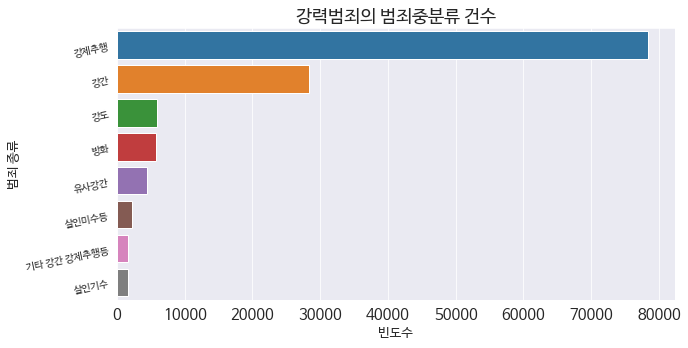

In [22]:
plt.figure(figsize = (10,5))
plt.rc('font', family='NanumBarunGothic') # 힌글 폰트 지정(맑은 고딕)
plt.title('강력범죄의 범죄중분류 건수', fontsize = 18)


sns.barplot(data=df3, y='범죄중분류', x='합계')
sns.set_style('whitegrid') # 그래프 스타일 지정
plt.xlabel('빈도수', fontsize = 13) # x축 제목 서식 설정
plt.ylabel('범죄 종류', fontsize = 13) # y축 제목 서식 설정
plt.xticks(fontsize = 15) # x축 레이블 서식 설정
plt.yticks(fontsize = 10, rotation = 12) # y축 레이블 서식 설정
plt.show()

## 해당 그래프는 x, y가 반대이므로 x, y값 서식 설정을 반대로 생각해서 지정해야 한다.

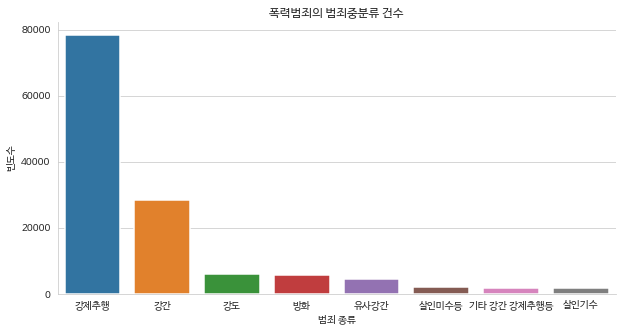

In [23]:
# 막대그래프 시각화
mpl.rc('font', family = 'NanumBarunGothic') # 한글 폰트 지정(LG PC)
plt.figure(figsize=(10, 5))
plt.title('폭력범죄의 범죄중분류 건수')

sns.set_style('white') # 그래프 스타일 지정(그리드 없는 스타일)
sns.despine() # 축/테두리 제거
sns.set_context("talk", font_scale=1) # 스케일 크기 조정

sns.barplot(data=df3, x='범죄중분류', y='합계')
plt.xlabel('범죄 종류')
plt.ylabel('빈도수')

plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPyth

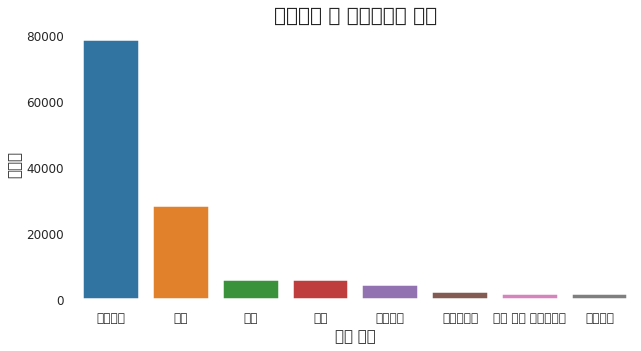

In [24]:
# 막대그래프 시각화
mpl.rc('font', family = 'LG PC') # 한글 폰트 지정(LG PC)
plt.figure(figsize=(10, 5))
plt.title('지능범죄 중 범죄중분류 건수', fontsize = 20)

sns.set_style('whitegrid')
sns.despine(left=True, bottom=True)
sns.barplot(data=df3, x='범죄중분류', y='합계')

plt.xlabel('범죄 종류', fontsize=15)
plt.ylabel('빈도수', fontsize=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

In [25]:
# 혼인 합계, 미혼 합계 컬럼 생성
df1['혼인_합계'] = df1['혼인관계(유배우자)'] + df1['혼인관계(동거)'] + df1['혼인관계(이혼)'] + df1['혼인관계(사별)']

df1['미혼_합계'] = df1['미혼자부모관계(실(양)부모)'] + df1['미혼자부모관계(계부모)'] + df1['미혼자부모관계(실부계모)'] + df1['미혼자부모관계(실부무모)'] + df1['미혼자부모관계(실모계부)'] + df1['미혼자부모관계(실모무부)'] + df1['미혼자부모관계(계부무모)'] + df1['미혼자부모관계(계모무부)'] + df1['미혼자부모관계(무부모)']

df1.head()

,범죄대분류,범죄중분류,생활정도(계),생활정도(하류),생활정도(중류),생활정도(상류),생활정도(미상),혼인관계(계),혼인관계(소계),혼인관계(유배우자),...,미혼자부모관계(실부계모),미혼자부모관계(실부무모),미혼자부모관계(실모계부),미혼자부모관계(실모무부),미혼자부모관계(계부무모),미혼자부모관계(계모무부),미혼자부모관계(무부모),미상,혼인_합계,미혼_합계
0,강력범죄,살인기수,341,172,72,6,91,341,158,81,...,2,8,0,17,0,0,20,91,158,92
1,강력범죄,살인미수등,454,276,93,3,82,454,234,123,...,0,10,1,19,0,1,24,82,234,138
2,강력범죄,강도,1202,713,327,15,147,1202,257,144,...,8,37,8,69,0,3,56,147,257,798
3,강력범죄,강간,6113,1831,1987,78,2217,6113,1295,798,...,23,143,19,270,0,2,139,2216,1295,2602
4,강력범죄,유사강간,934,331,362,7,234,934,236,145,...,4,21,3,55,0,1,29,232,236,466


In [26]:
df2 = df1[['범죄중분류', '혼인_합계', '미혼_합계']].set_index('범죄중분류')
df2.sort_values(by='혼인_합계', ascending = False, inplace = True)
df2

,혼인_합계,미혼_합계
범죄중분류,,
교통범죄,140745,79967
기타범죄,110901,57299
사기,65125,65200
폭행,62799,34999
소계,43426,44743
특별경제범죄,30402,17188
상해,24499,14730
손괴,19447,11862
횡령,13463,7544


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPyth

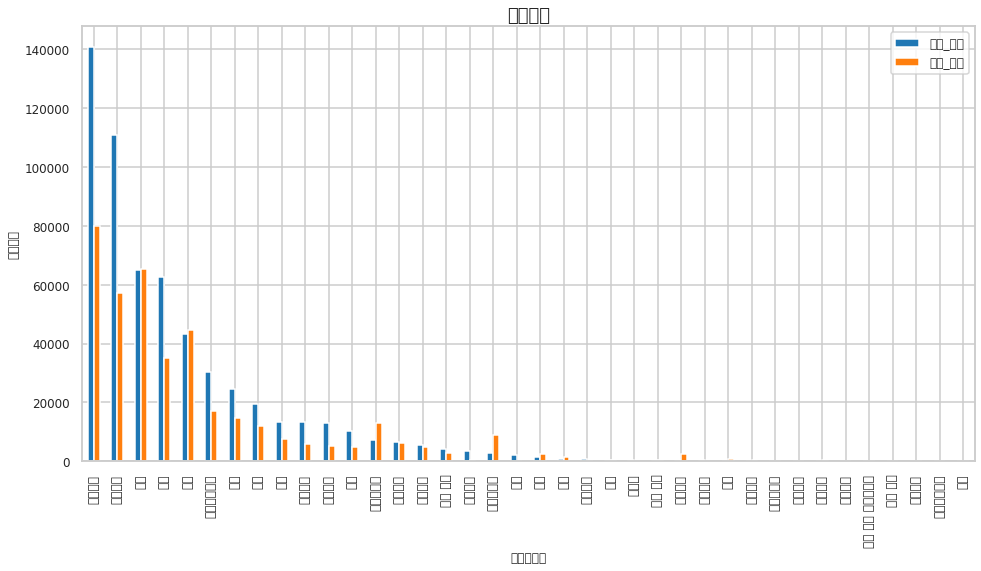

In [27]:
# 막대그래프 시각화
ax = df2.sort_values(by='혼인_합계', ascending=False).plot(kind='bar', title='범죄분석', figsize=(16, 8), legend=True, fontsize=12) 

ax.set_xlabel('범죄중분류', fontsize=12) # x축 정보 표시 
ax.set_ylabel('범죄건수', fontsize=12) # y축 정보 표시 
ax.legend(['혼인_합계', '미혼_합계'], fontsize=12)

plt.show()